# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#Analysis
1.The scatterplot clearly shows that the maximum temperature is highest at 0 degree latitude and decreases as you go away.So the temperatures are warmer near the equator and cooler away from equator.
2.The percentage of humidity and cloudiness are not dependent on the latitude.The scatterplot does not show any trend here.
3.The wind speed increases as you move away from the equator.Again latitude is not the only factor affecting the wind speed.It needs further analysis.


In [114]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [115]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [116]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#cities


593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [117]:
#create empty lists for each weather parameter
#temperatures = []
humidity_list = []
cloudiness_list =[]
wind_speed = []
latitude = []
cities_with_data = []
country_list = []
Date_list = []
max_temp =[]
longitude =[]

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#print statement at the begining of the loop
print(f'Begining data retrieval')
print(f'--------------')

#create the counter for city at 0 
city_with_data_counter = 0

# loop through cities, make API request, and append desired results
for city in cities:
    print(city)
    # Build query URL and request your results in Fahrenheit
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json() 
    #print(weather_json)
    
    #if statement for storing data where values are found (these cities have cod=200 in json file)
    if(weather_json["cod"] == 200):
        #start the counter
        city_with_data_counter += 1
        #start appending the parameters
        cities_with_data.append(city)
        #temperature =weather_json["main"]["temp"]
        #temperatures.append(temperature)
        humidity = weather_json["main"]["humidity"] 
        humidity_list.append(humidity)
        cloudiness = weather_json["clouds"]["all"]
        cloudiness_list.append(cloudiness)
        windspeed =  weather_json["wind"]["speed"]
        wind_speed.append(windspeed)
        lat = weather_json["coord"]["lat"]
        latitude.append(lat)
        long = weather_json["coord"]["lon"]
        longitude.append(long)
        country = weather_json["sys"]["country"]
        country_list.append(country)
        Date = weather_json["dt"]
        Date_list.append(Date)
        max_temperature  = weather_json["main"]["temp_max"]
        max_temp.append(max_temperature)
        
        print(f'Processing Record {city_with_data_counter}|{city}')
        #print(Query_url)
        
    #if no city found then print... 
    else:
        print(f'city not found.skipping...')
        
        
        


#print end line
print(f'------------------------')
print(f'Data Retrieval complete')



            



Begining data retrieval
--------------
sakaiminato
Processing Record 1|sakaiminato
limulunga
Processing Record 2|limulunga
hermanus
Processing Record 3|hermanus
taolanaro
city not found.skipping...
mar del plata
Processing Record 4|mar del plata
lagoa
Processing Record 5|lagoa
sentyabrskiy
city not found.skipping...
avarua
Processing Record 6|avarua
nurota
Processing Record 7|nurota
darovskoy
Processing Record 8|darovskoy
atar
Processing Record 9|atar
aykhal
Processing Record 10|aykhal
ostersund
Processing Record 11|ostersund
georgetown
Processing Record 12|georgetown
provideniya
Processing Record 13|provideniya
haines junction
Processing Record 14|haines junction
port alfred
Processing Record 15|port alfred
vaini
Processing Record 16|vaini
cap malheureux
Processing Record 17|cap malheureux
thabazimbi
Processing Record 18|thabazimbi
klaksvik
Processing Record 19|klaksvik
cape town
Processing Record 20|cape town
kodiak
Processing Record 21|kodiak
fairbanks
Processing Record 22|fairbanks

Processing Record 186|pevek
norman wells
Processing Record 187|norman wells
derac
Processing Record 188|derac
watertown
Processing Record 189|watertown
gold coast
Processing Record 190|gold coast
natitingou
Processing Record 191|natitingou
acarau
city not found.skipping...
muisne
Processing Record 192|muisne
yalvac
Processing Record 193|yalvac
titron
Processing Record 194|titron
pontes e lacerda
Processing Record 195|pontes e lacerda
maghama
city not found.skipping...
utiroa
city not found.skipping...
rio grande
Processing Record 196|rio grande
russell
Processing Record 197|russell
puerto ayora
Processing Record 198|puerto ayora
panuco
Processing Record 199|panuco
shevchenkove
Processing Record 200|shevchenkove
hanyang
Processing Record 201|hanyang
taoudenni
Processing Record 202|taoudenni
naze
Processing Record 203|naze
talara
Processing Record 204|talara
huilong
Processing Record 205|huilong
banda aceh
Processing Record 206|banda aceh
alice springs
Processing Record 207|alice springs

Processing Record 365|kerema
maloy
Processing Record 366|maloy
la ronge
Processing Record 367|la ronge
aquiraz
Processing Record 368|aquiraz
baoqing
Processing Record 369|baoqing
mwanza
Processing Record 370|mwanza
bandarbeyla
Processing Record 371|bandarbeyla
san matias
Processing Record 372|san matias
zyryanovsk
Processing Record 373|zyryanovsk
ambodifototra
city not found.skipping...
turinskaya sloboda
Processing Record 374|turinskaya sloboda
chumikan
Processing Record 375|chumikan
villazon
city not found.skipping...
namie
Processing Record 376|namie
teya
Processing Record 377|teya
namibe
Processing Record 378|namibe
cabra
Processing Record 379|cabra
plettenberg bay
Processing Record 380|plettenberg bay
severobaykalsk
Processing Record 381|severobaykalsk
plouzane
Processing Record 382|plouzane
imeni poliny osipenko
Processing Record 383|imeni poliny osipenko
henties bay
Processing Record 384|henties bay
zhicheng
Processing Record 385|zhicheng
san quintin
Processing Record 386|san qu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [118]:


#create a summary table of the parameters appended and store in a dataframe
Summary_table= pd.DataFrame({"City":cities_with_data,
                             "Cloudiness":cloudiness_list,
                             "Country":country_list,
                             "Date":Date_list,
                             "Humidity":humidity_list,
                             "Lat":latitude,
                             "Lng":longitude,
                             "Max Temp":max_temp,
                             "Wind Speed":wind_speed})
                                
                                

  
    

                             
                             
#save data as csv

Summary_table.to_csv("output/summary.csv",header =True)  

Summary_table                            
                              



,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sakaiminato,75,JP,1561641196,88,35.55,133.23,75.20,11.41
1,limulunga,0,ZM,1561641196,19,-15.13,23.15,84.08,4.99
2,hermanus,100,ZA,1561641196,23,-34.42,19.24,71.01,11.99
3,mar del plata,100,AR,1561641218,59,-46.43,-67.52,32.24,7.54
4,lagoa,0,PT,1561641218,68,37.14,-8.45,75.99,14.99
5,avarua,25,CK,1561641219,83,-21.21,-159.78,69.80,2.24
6,nurota,83,UZ,1561641219,11,40.56,65.69,100.40,18.34
7,darovskoy,48,RU,1561641219,41,58.77,47.96,66.44,5.61
8,atar,0,MR,1561641220,11,20.52,-13.05,106.22,13.91
9,aykhal,40,RU,1561641220,41,65.95,111.51,77.00,6.71


In [119]:
#check count of each coloumn
Summary_table.count()
                             
              

City          520
Cloudiness    520
Country       520
Date          520
Humidity      520
Lat           520
Lng           520
Max Temp      520
Wind Speed    520
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

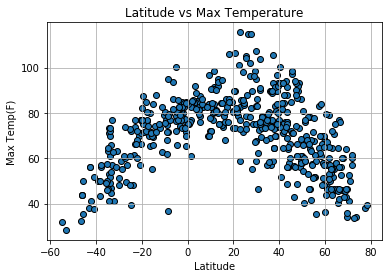

In [120]:
# Build a scatter plot for each data type
plt.scatter(Summary_table["Lat"],Summary_table["Max Temp"], marker="o",edgecolor="black")

# Incorporate the other graph properties
plt.title("Latitude vs Max Temperature")
plt.ylabel("Max Temp(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("images/temp_plot.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

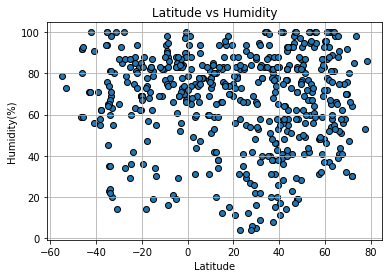

In [121]:
# Build a scatter plot for each data type
plt.scatter(Summary_table["Lat"],Summary_table["Humidity"], marker="o",edgecolor="black")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("images/humidity_plot.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

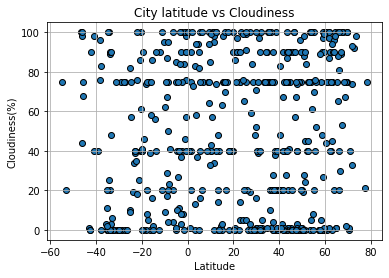

In [122]:
# Build a scatter plot for each data type
plt.scatter(Summary_table["Lat"],Summary_table["Cloudiness"], marker="o",edgecolor="black")

# Incorporate the other graph properties
plt.title("City latitude vs Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("images/cloudiness_plot.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

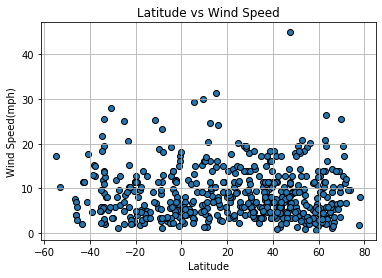

In [123]:
# Build a scatter plot for each data type
plt.scatter(Summary_table["Lat"],Summary_table["Wind Speed"], marker="o",edgecolor="black")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("images/wind_speed.png")

# Show plot
plt.show()
